# Feature scaling

#### Below are the functions for performing logistic regression using gradient descent from the previous homework

In [115]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [116]:
X, y = load_breast_cancer(return_X_y=True)

# Add a vector of ones to the data matrix to absorb the bias term
X = np.hstack([np.ones([X.shape[0], 1]), X])

# Set the random seed so that we have reproducible experiments
np.random.seed(123)

# Split into train and test
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [117]:
def sigmoid(t):
    return 1.0 / (1 + np.exp(-t))

In [118]:
def negative_log_likelihood(X, y, w):
    nll = - ( y @ np.log(sigmoid(w @ X.T)).T + (1 - y) @ (np.log(1 - sigmoid(w @ X.T))).T)
    return nll

In [119]:
def compute_loss(X, y, w, lmbda):
    return negative_log_likelihood(X, y, w) / len(y) + lmbda * 0.5 * np.linalg.norm(w[1:])**2

In [120]:
def get_gradient(X, y, w, mini_batch_indices, lmbda):
    n_batch = mini_batch_indices.shape[0]
    nll_gradient = np.dot(X[mini_batch_indices].T,sigmoid(np.dot(X[mini_batch_indices], w)) - y[mini_batch_indices])
    ones = np.ones(w.shape)
    ones[0] = 0
    reg_gradient = lmbda * ones * w
    grad = nll_gradient / n_batch + reg_gradient  
    return grad

In [121]:
def logistic_regression(X, y, num_steps, learning_rate, mini_batch_size, lmbda, verbose):
    trace = []
    n_train = X.shape[0] 
    
    w = np.zeros(X.shape[1])
    
    for step in range(num_steps):
        permuted_idx = np.random.permutation(n_train)
        
        for idx in range(0, n_train, mini_batch_size):
            mini_batch_indices = permuted_idx[idx:idx+mini_batch_size]
            gradient = get_gradient(X, y, w, mini_batch_indices, lmbda)
            w = w - learning_rate * gradient
        
        if step % 50 == 0:
            loss = compute_loss(X, y, w, lmbda)
            trace.append(loss)
            if verbose:
                print('Step {0}, loss = {1:.4f}'.format(step, loss))
    return w, trace

In [122]:
def predict(X, w):
    return (sigmoid(np.dot(X, w)) > 0.5).astype(np.int64)

## running and observing results

In [123]:
# Change this to True if you want to see loss values over iterations.
verbose = False

In [124]:
n_train = X_train.shape[0]
w_full, trace_full = logistic_regression(X_train, 
                                         y_train, 
                                         num_steps=8000, 
                                         learning_rate=1e-5, 
                                         mini_batch_size=n_train, 
                                         lmbda=0.1,
                                         verbose=verbose)

In [125]:
n_train = X_train.shape[0]
w_minibatch, trace_minibatch = logistic_regression(X_train, 
                                                   y_train, 
                                                   num_steps=8000, 
                                                   learning_rate=1e-5,
                                                   mini_batch_size=50, 
                                                   lmbda=0.1,
                                                   verbose=verbose)

In [126]:
y_pred_full = predict(X_test, w_full)
y_pred_minibatch = predict(X_test, w_minibatch)

print('Full batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_full), f1_score(y_test, y_pred_full)))
print('Mini-batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_minibatch), f1_score(y_test, y_pred_minibatch)))

Full batch: accuracy: 0.9240, f1_score: 0.9384
Mini-batch: accuracy: 0.9415, f1_score: 0.9533


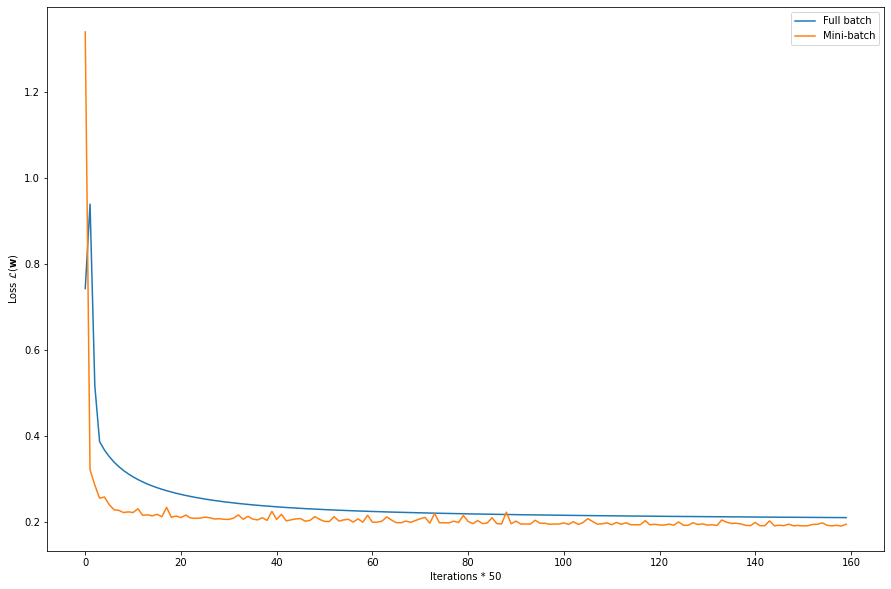

In [127]:
plt.figure(figsize=[15, 10])
plt.plot(trace_full, label='Full batch')
plt.plot(trace_minibatch, label='Mini-batch')
plt.xlabel('Iterations * 50')
plt.ylabel('Loss $\mathcal{L}(\mathbf{w})$')
plt.legend()
plt.show()

## Task 1: Apply minmax normalization on X_train and X_test data without sklearn
#### Note: don't do it for the first column as it is the column of ones
#### use the parameters learnt from the training data to transform the test data
#### optionally try doing it also with sklearn

In [128]:
X, y = load_breast_cancer(return_X_y=True)

# Add a vector of ones to the data matrix to absorb the bias term
X = np.hstack([np.ones([X.shape[0], 1]), X])

# Set the random seed so that we have reproducible experiments
np.random.seed(123)

# Split into train and test
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [129]:
from sklearn import preprocessing

tr = X_train[:, 1:]
ts = X_test[:, 1:]
minn = np.min(tr)
maxx = np.max(tr)
scaled_tr = (tr - minn) / (maxx - minn)
scaled_ts = (ts - minn) / (maxx - minn)
X_train[:, 1:] = scaled_tr
X_test[:, 1:] = scaled_ts


# #sklearn
# scaler = preprocessing.MinMaxScaler()
# foo = X_train[:, 1:]
# boo = X_test[:, 1:]
# scaled2 = scaler.fit_transform(foo)
# scaled3 = scaler.transform(boo)
# X_train[:, 1:] = scaled2
# X_test[:, 1:] = scaled3

## Task2: Run gradient descent using the scaled dataset and see the results
#### Note: you may change the learning rate or lambda parameters. Don't change the number of iterations to get comparable results

In [130]:
verbose = False
n_train = X_train.shape[0]
w_full, trace_full = logistic_regression(X_train, 
                                         y_train, 
                                         num_steps=8000, 
                                         learning_rate=1e-5, 
                                         mini_batch_size=n_train, 
                                         lmbda=0.1,
                                         verbose=verbose)

In [131]:
n_train = X_train.shape[0]
w_minibatch, trace_minibatch = logistic_regression(X_train, 
                                                   y_train, 
                                                   num_steps=8000, 
                                                   learning_rate=1e-5,
                                                   mini_batch_size=50, 
                                                   lmbda=0.1,
                                                   verbose=verbose)

In [132]:
y_pred_full = predict(X_test, w_full)
y_pred_minibatch = predict(X_test, w_minibatch)

print('Full batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_full), f1_score(y_test, y_pred_full)))
print('Mini-batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_minibatch), f1_score(y_test, y_pred_minibatch)))

Full batch: accuracy: 0.6023, f1_score: 0.7518
Mini-batch: accuracy: 0.6023, f1_score: 0.7518


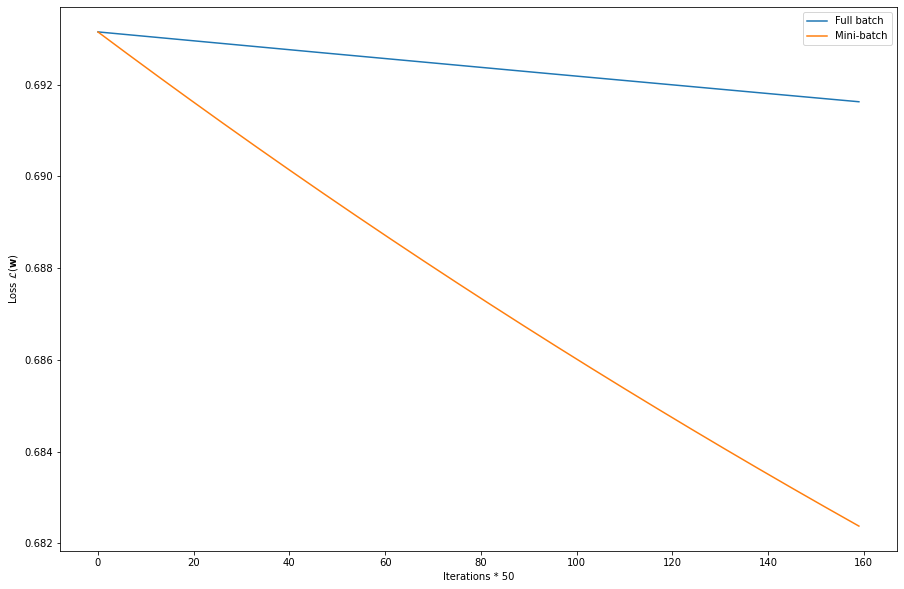

In [133]:
plt.figure(figsize=[15, 10])
plt.plot(trace_full, label='Full batch')
plt.plot(trace_minibatch, label='Mini-batch')
plt.xlabel('Iterations * 50')
plt.ylabel('Loss $\mathcal{L}(\mathbf{w})$')
plt.legend()
plt.show()

## Task 3: Apply z-score normalization (standard scaling) on original X_train and X_test data without sklearn
#### Note: don't do it for the first column as it is the column of ones
#### use the parameters learnt from the training data to transform the test data
#### optionally try doing it also with sklearn

In [113]:
X, y = load_breast_cancer(return_X_y=True)

# Add a vector of ones to the data matrix to absorb the bias term
X = np.hstack([np.ones([X.shape[0], 1]), X])

# Set the random seed so that we have reproducible experiments
np.random.seed(123)

# Split into train and test
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

[[ 1.      11.51    23.93    ...  0.09653  0.2112   0.08732]
 [ 1.      13.77    13.27    ...  0.05802  0.2823   0.06794]
 [ 1.      17.19    22.07    ...  0.1984   0.3216   0.0757 ]
 ...
 [ 1.      12.05    22.72    ...  0.1092   0.2191   0.09349]
 [ 1.      20.44    21.78    ...  0.1765   0.2609   0.06735]
 [ 1.      11.74    14.69    ...  0.1056   0.2604   0.09879]]


In [114]:
# tr = X_train[:, 1:]
# ts = X_test[:, 1:]
# mean = np.mean(tr)
# std = np.std(tr)
# scaled_tr = (tr - mean) / std
# scaled_ts = (ts - mean) / std
# X_train[:, 1:] = scaled_tr
# X_test[:, 1:] = scaled_ts

# #sklearn
scaler = preprocessing.StandardScaler()
foo = X_train[:, 1:]
boo = X_test[:, 1:]
scaled2 = scaler.fit_transform(foo)
scaled3 = scaler.transform(boo)
X_train[:, 1:] = scaled2
X_test[:, 1:] = scaled3

## Task4: Run gradient descent using the scaled dataset and see the results
#### Note: you may change the learning rate or lambda parameters. Don't change the number of iterations to get comparable results
### try to get better results than the original ones

In [89]:
verbose = False
n_train = X_train.shape[0]
w_full, trace_full = logistic_regression(X_train, 
                                         y_train, 
                                         num_steps=8000, 
                                         learning_rate=1e-5, 
                                         mini_batch_size=n_train, 
                                         lmbda=0.1,
                                         verbose=verbose)

In [90]:
n_train = X_train.shape[0]
w_minibatch, trace_minibatch = logistic_regression(X_train, 
                                                   y_train, 
                                                   num_steps=8000, 
                                                   learning_rate=1e-5,
                                                   mini_batch_size=50, 
                                                   lmbda=0.1,
                                                   verbose=verbose)

In [91]:
y_pred_full = predict(X_test, w_full)
y_pred_minibatch = predict(X_test, w_minibatch)

print('Full batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_full), f1_score(y_test, y_pred_full)))
print('Mini-batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_minibatch), f1_score(y_test, y_pred_minibatch)))

Full batch: accuracy: 0.3977, f1_score: 0.0000
Mini-batch: accuracy: 0.3977, f1_score: 0.0000


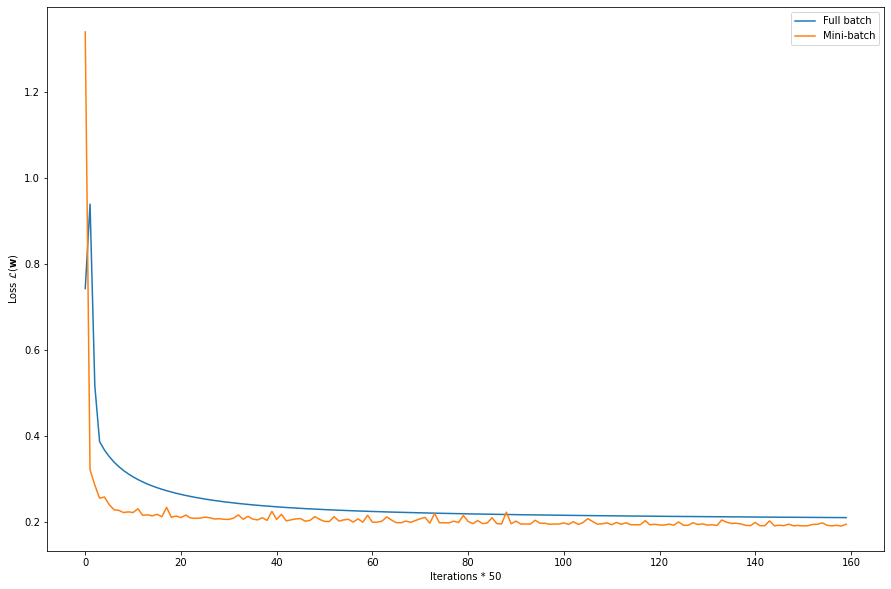

In [92]:
plt.figure(figsize=[15, 10])
plt.plot(trace_full, label='Full batch')
plt.plot(trace_minibatch, label='Mini-batch')
plt.xlabel('Iterations * 50')
plt.ylabel('Loss $\mathcal{L}(\mathbf{w})$')
plt.legend()
plt.show()